In [6]:
import os
os.chdir("/workspace")


import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import confseq
from confseq import predmix, conjmix_bounded, betting
import algorithm
from algorithm import ConfSeq


In [7]:
def standardise(x):
    return (x - x.min()) / (x.max() - x.min())

In [8]:
class HoffConf(algorithm.ConfSeq):
    def __init__(self, conf_lvl: float):
        super().__init__(conf_lvl)
    
    def calculate_cs(self, x):
        min_val, max_val =  x.min(), x.max()
        normalized = (x - min_val) / (max_val - min_val)
        lower_cs, higher_cs = predmix.predmix_hoeffding_cs(normalized, self.conf_lvl)

        lower_cs = lower_cs * (max_val - min_val) + min_val
        higher_cs = higher_cs * (max_val - min_val) + min_val
        return lower_cs, higher_cs
    
    @staticmethod
    def standardise(x):
        return (x - x.min()) / (x.max() - x.min())
    

class EmpbernConf(algorithm.ConfSeq):
    def __init__(self, conf_lvl: float):
        super().__init__(conf_lvl)
    
    def calculate_cs(self, x):
        min_val, max_val =  x.min(), x.max()
        normalized = (x - min_val) / (max_val - min_val)
        lower_cs, higher_cs = predmix.predmix_empbern_twosided_cs(normalized, self.conf_lvl, running_intersection=True)

        lower_cs = lower_cs * (max_val - min_val) + min_val
        higher_cs = higher_cs * (max_val - min_val) + min_val
        return lower_cs, higher_cs
    

class EmpbernConjmix(algorithm.ConfSeq):
    def __init__(self, conf_lvl: float):
        super().__init__(conf_lvl)
    
    def calculate_cs(self, x):
        min_val, max_val =  x.min(), x.max()
        normalized = (x - min_val) / (max_val - min_val)
        lower_cs, higher_cs = conjmix_bounded.conjmix_empbern_twosided_cs(normalized, 1/12, self.conf_lvl)

        lower_cs = lower_cs * (max_val - min_val) + min_val
        higher_cs = higher_cs * (max_val - min_val) + min_val
        return lower_cs, higher_cs


In [13]:
np.random.seed(0)
data = np.random.normal(2, 3, 1000)
data = np.random.uniform(0.4, 0.5, 1000)
print(f"data statistics: mean={np.mean(data)}, std={np.std(data)}")
print(f"min={np.min(data)}, median={np.median(data)}, max={np.max(data)}")

min_val = np.min(data)
max_val = np.max(data)


lower_ci, higher_ci = predmix.predmix_hoeffding_cs(x=standardise(data))

lower_ci = lower_ci * (max_val - min_val) + min_val
higher_ci = higher_ci * (max_val - min_val) + min_val

# print(f"lower_ci={lower_ci}")
# print(f"higher_ci={higher_ci}")



data statistics: mean=0.4512865739825976, std=0.02920954995384708
min=0.40000736994331065, median=0.45281985274833686, max=0.49985265777083543


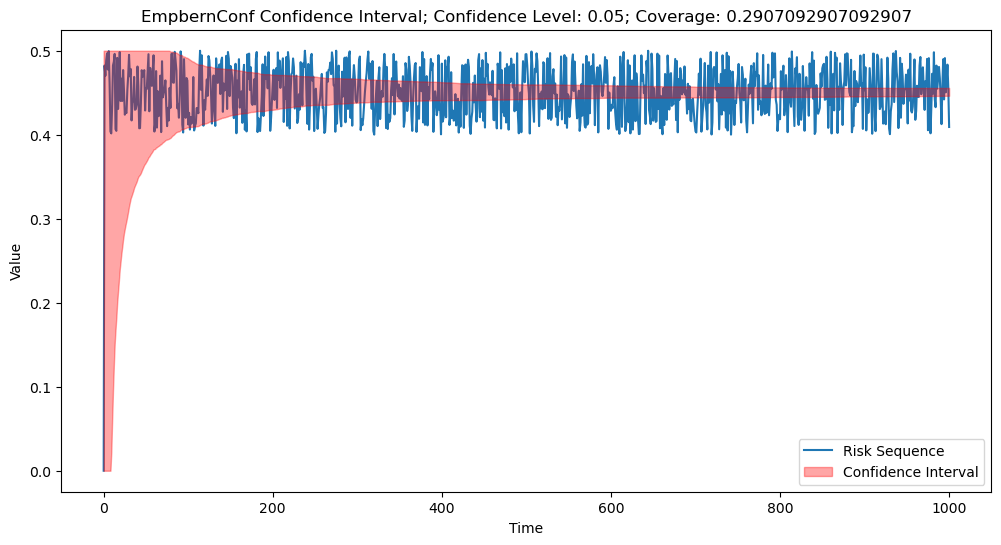

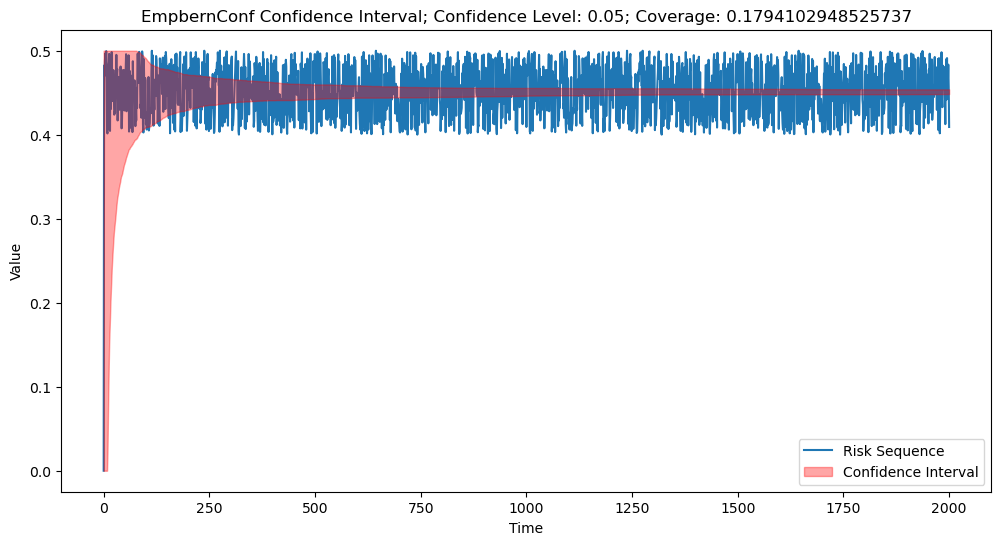

In [28]:
hoff_cs = EmpbernConf(conf_lvl=0.05)
cs = hoff_cs.update(data)
hoff_cs.plot()

hoff_cs.update(data)
hoff_cs.plot()